<a href="https://colab.research.google.com/github/FrostLiam/GoogleExploreCSR_NLP/blob/main/NBSVM_CSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load dataset

#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

google_docs = {
    '1-HUEYGrKD67t-4Yc136ioyVztQSE8H7I' : 'fashion_dataset.csv', #raw data

    # after data cleaning (label, review)
    '1kmTVkueHUYtm1GzbKqOZg00_1OkZOz0V' :'fashion_2_train.csv', 
    '11mo70rOiutI73IG_7qvqcxBjHF2Wq69u' :'fashion_2_test.csv', 
}

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

for key in google_docs:
  drive.CreateFile({'id':key}).GetContentFile(google_docs[key])


In [ ]:
!pip install ktrain

In [4]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ktrain
from ktrain import text

In [5]:
# read in training and test dataset
train_df = pd.read_csv('fashion_2_train.csv')
test_df = pd.read_csv('fashion_2_test.csv')

In [ ]:
train_df.info

<bound method DataFrame.info of        label                                             review
0          3  I had such high hopes for this dress and reall...
1          5  I love, love, love this jumpsuit. it's fun, fl...
2          5  This shirt is very flattering to all due to th...
3          2  I love tracy reese dresses, but this one is no...
4          5  I aded this in my basket at hte last mintue to...
...      ...                                                ...
13758      1  The styling of this top is so cute but the fab...
13759      3  I fell in love with the shirt when i saw it on...
13760      5  I tried on te regualr size (xs) as that is all...
13761      5  This sweater is substantial, well-made, fabric...
13762      4  Great top but it runs smaller than other tops ...

[13763 rows x 2 columns]>

In [11]:
# split both datasets into x and y based off of the review column and the label column
# mapped the labels to be strings instead of ints to bypass class_names which kept giving errors

x_train = list(train_df['review'])
y_train = list(map(str, train_df['label']))
x_test = list(test_df['review'])
y_test = list(map(str, test_df['label']))

In [12]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test,
                                          ngram_range=1, lang='en')

language: en
Word Counts: 12219
Nrows: 13763
13763 train sequences
train sequence lengths:
	mean : 62
	95percentile : 102
	99percentile : 107
x_train shape: (13763,400)
y_train shape: (13763, 5)
Is Multi-Label? False
5899 test sequences
test sequence lengths:
	mean : 63
	95percentile : 102
	99percentile : 107
x_test shape: (5899,400)
y_test shape: (5899, 5)
task: text classification


In [13]:
model = text.text_classifier('nbsvm', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 400
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-13763
computing log-count ratios...
done.


In [14]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
431/431 [==============================] - 5s 4ms/step - loss: 1.6065 - accuracy: 0.2686
Epoch 2/1024
431/431 [==============================] - 2s 4ms/step - loss: 1.5836 - accuracy: 0.3748
Epoch 3/1024
431/431 [==============================] - 2s 4ms/step - loss: 1.1751 - accuracy: 0.5843
Epoch 4/1024
431/431 [==============================] - 2s 4ms/step - loss: 1.2331 - accuracy: 0.7223
Epoch 5/1024
431/431 [==============================] - 0s 18us/step - loss: 9.9230 - accuracy: 0.6251


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


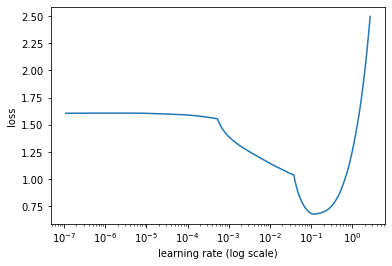

In [15]:
learner.lr_find()
learner.lr_plot()

In [17]:
learner.autofit(2e-2, 10)



begin training using triangular learning rate policy with max lr of 0.02...
Epoch 1/10
431/431 [==============================] - 2s 5ms/step - loss: 0.4475 - accuracy: 0.8375 - val_loss: 1.2078 - val_accuracy: 0.5965
Epoch 2/10
431/431 [==============================] - 2s 5ms/step - loss: 0.4298 - accuracy: 0.8439 - val_loss: 1.2546 - val_accuracy: 0.5993
Epoch 3/10
431/431 [==============================] - 2s 5ms/step - loss: 0.4148 - accuracy: 0.8492 - val_loss: 1.3015 - val_accuracy: 0.5948
Epoch 4/10
431/431 [==============================] - 2s 5ms/step - loss: 0.4014 - accuracy: 0.8545 - val_loss: 1.3475 - val_accuracy: 0.5965
Epoch 5/10
431/431 [==============================] - 2s 5ms/step - loss: 0.3893 - accuracy: 0.8564 - val_loss: 1.4054 - val_accuracy: 0.5915
Epoch 6/10
431/431 [==============================] - 2s 5ms/step - loss: 0.3806 - accuracy: 0.8625 - val_loss: 1.4455 - val_accuracy: 0.5903
Epoch 7/10
431/431 [==============================] - 2s 5ms/step - lo

In [18]:
learner.validate()

              precision    recall  f1-score   support

           0       0.20      0.20      0.20       224
           1       0.22      0.18      0.20       422
           2       0.33      0.31      0.32       744
           3       0.39      0.37      0.38      1332
           4       0.76      0.81      0.78      3177

    accuracy                           0.58      5899
   macro avg       0.38      0.37      0.38      5899
weighted avg       0.56      0.58      0.57      5899



array([[  45,   63,   62,   30,   24],
       [  35,   78,  160,   96,   53],
       [  55,  110,  230,  221,  128],
       [  37,   55,  147,  489,  604],
       [  52,   41,  107,  407, 2570]])

In [19]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [21]:
predictor.get_classes()

['1', '2', '3', '4', '5']

In [24]:
# actual rating was 4
predictor.predict("The material feels nice and i love the flared arms.")

'3'

In [25]:
# actual rating was 1
predictor.predict("I love the teal color of this t-shirt and the macrame design at the top is beautiful, however, the top is way too large.  i usually wear a size xs or s in retailer tops, so i ordered the size s, there is so much fabric below the chest it fits like a maternity top.  i know if i order an xs, i will have the same problem.  below the bust, the top is not flattering and it&amp;#39;s a shame.")

'3'

In [26]:
# actual rating was 5
predictor.predict("I've had great luck with items from sunday in brooklyn & this vest is another fantastic purchase. the color/fit match the photos. the material is so soft. i've worn it quite a bit since i received it and it hasn't pilled. it's washed well too. the braided part can be folded down if you don't want it higher on your neck. it will still lay flat & drape nicely. it's perfect for cold weather. i'd love to see this come out in other colors too.")

'5'

In [27]:
# actual rating was 2
predictor.predict("I initially liked the feel and quality of the top but once it was on it was much shorter and looser than the picture of the model. it flowed out from my chest with one central pleat in the front and my husband said it made me look pregnant. then came the tedious task of taking it off with such a snug fit in the shoulders. i'm regularly a size 2/xs, 32d and 120 lbs and both size 2 and 4 did not work for me.")

'3'

In [28]:
# actual rating was 5
predictor.predict("This vest is so functional. i think it is much prettier in person than in this photo. it has a much softer look to it and is less orange, more tan. i've worn it with a lot of different things: over a sweater dress at work, with soft pants and a long-sleeve t-shirt, or skinny jeans/pants and a simple top. wish it came in other colors (gray, navy or green would all be amazing)...one of my favorite pieces this season for sure. i do think it runs a little bit large, but i think the next size smaller")

'5'

In [29]:
# actual rating was 2
predictor.predict("I looked at this dress for a long time before i purchased it because of the money. i wear a size 2p. was entirely disappointed in the style and construction of this dress. for one thing the lining is bulky and you could never wear it in warmer weather without burning up. the dress as pictured looks very feminine and light weight silk but there is just too much material going on--- thick and heavy. the overall fit was too big and very unflattering.")

'3'

-----END OF CODE-----